# Benchmark analysis
## Table of contents
1. [Reading the data](#Reading-the-data)
1. [Separating the catagories](#Separating-the-categories)
1. [Parties vs iterations category](#Parties_vs_iterations-category)
1. [Features category](#Features-category)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np

%matplotlib inline

In [2]:
# Number of repeats that every experiment has been done
NUM_REPEATS = 3

dtypes = {"records": int, "features": int, "iterations": int, "parties": int}

## Reading the data

In [3]:
results_path = Path("benchmark_results")

benchmark_ours_raw = pd.read_csv(results_path/"results_ours.csv")
benchmark_original_raw = pd.read_csv(results_path/"results_original.csv")
parameters_df = pd.read_csv("python/benchmark/benchmark_parameters.csv")



Every row for the benchmark parameters has been executed `NUM_REPEATS` times.

In [4]:
def duplicate_categories(categories, repeats=NUM_REPEATS):
    for c in categories:
        for _ in range(repeats):
            yield c
            
categories = parameters_df.category.to_list()
duplicated_categories = duplicate_categories(categories)

duplicated_categories = pd.Series(duplicated_categories, name="category")
duplicated_categories

0     parties_vs_iterations
1     parties_vs_iterations
2     parties_vs_iterations
3     parties_vs_iterations
4     parties_vs_iterations
              ...          
82                  records
83                  records
84                  records
85                  records
86                  records
Name: category, Length: 87, dtype: object

In [5]:
def preprocess_benchmark(df: pd.DataFrame):
    df = df[df.comment!="Not enough features"]
    
    df=df.join(duplicated_categories)
    
    for column, dtype in dtypes.items():
        df[column] = df[column].astype(dtype)
    
    return df

benchmark_ours = preprocess_benchmark(benchmark_ours_raw)
benchmark_original = preprocess_benchmark(benchmark_original_raw)

### Benchmark of original verticox

In [6]:
benchmark_original

,records,features,iterations,parties,preparation_runtime,convergence_runtime,mse,sad,mad,c_index_verticox,c_index_central,comment,category
0,100,6,100,2,4.882292,30.678462,1.397122e-07,1.582774e-03,7.776980e-04,0.555556,0.555556,success,parties_vs_iterations
1,100,6,100,2,4.908516,31.539459,1.397122e-07,1.582774e-03,7.776980e-04,0.555556,0.555556,success,parties_vs_iterations
2,100,6,100,2,4.932910,31.269929,1.397122e-07,1.582774e-03,7.776980e-04,0.555556,0.555556,success,parties_vs_iterations
3,100,6,500,2,4.896596,72.965675,3.157299e-12,5.011255e-06,4.320795e-06,0.555556,0.555556,success,parties_vs_iterations
4,100,6,500,2,4.912998,72.412871,3.157299e-12,5.011255e-06,4.320795e-06,0.555556,0.555556,success,parties_vs_iterations
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,100,6,500,3,6.330295,79.483288,1.231560e-12,2.991785e-06,2.712553e-06,0.555556,0.555556,success,records
80,100,6,500,3,6.320186,78.658826,1.231560e-12,2.991785e-06,2.712553e-06,0.555556,0.555556,success,records
81,500,6,500,3,6.322121,1259.663800,3.300806e-14,5.245640e-07,4.412577e-07,0.529808,0.529808,success,records
82,500,6,500,3,6.314870,1261.927420,3.300806e-14,5.245640e-07,4.412577e-07,0.529808,0.529808,success,records


### Benchmark of verticox+

In [7]:
benchmark_ours

,records,features,iterations,parties,preparation_runtime,convergence_runtime,mse,sad,mad,c_index_verticox,c_index_central,comment,category
0,100,6,100,2,5.391632,30.926261,1.397122e-07,1.582774e-03,7.776980e-04,0.555556,0.555556,success,parties_vs_iterations
1,100,6,100,2,5.420332,31.157926,1.397122e-07,1.582774e-03,7.776980e-04,0.555556,0.555556,success,parties_vs_iterations
2,100,6,100,2,5.580308,31.274326,1.397122e-07,1.582774e-03,7.776980e-04,0.555556,0.555556,success,parties_vs_iterations
3,100,6,500,2,5.431229,72.578496,3.157299e-12,5.011255e-06,4.320795e-06,0.555556,0.555556,success,parties_vs_iterations
4,100,6,500,2,5.483120,73.207568,3.157299e-12,5.011255e-06,4.320795e-06,0.555556,0.555556,success,parties_vs_iterations
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,500,6,500,3,6.296527,1260.047638,3.300806e-14,5.245640e-07,4.412577e-07,0.529808,0.529808,success,records
83,500,6,500,3,6.370931,1257.208806,3.300806e-14,5.245640e-07,4.412577e-07,0.529808,0.529808,success,records
84,1000,6,500,3,6.519942,13069.833756,5.843196e-15,2.141210e-07,1.864200e-07,0.446351,0.446351,success,records
85,1000,6,500,3,6.507154,13178.486900,5.843196e-15,2.141210e-07,1.864200e-07,0.446351,0.446351,success,records


## Parties_vs_iterations category

We will take the average of all the identical runs.

In [8]:
parties_vs_iterations_original = benchmark_original[benchmark_original.category == "parties_vs_iterations"].drop(columns=["category", "comment"])
parties_vs_iterations_ours = benchmark_ours[benchmark_ours.category == "parties_vs_iterations"].drop(columns=["category", "comment"])

In [9]:
keys = ["parties", "iterations"]

original_mean = parties_vs_iterations_original.groupby(keys).mean()
our_mean = parties_vs_iterations_ours.groupby(keys).mean()


(original_mean.mse - our_mean.mse).values

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

### Original verticox
I will share the performance of the original verticox in the paper. We don't have to analyze it in detail because the results are identical, at least for the SEER dataset.


In [10]:
original_mean[["mse", "sad", "mad", "c_index_verticox", "c_index_central"]].style\
    .format(subset=["c_index_verticox", "c_index_central"], precision=4)\
    .format("{:.4e}", subset=["mse", "sad", "mad"])

### Our results plus speed performance with original

In [11]:
our_mean_with_original = our_mean.join(original_mean[["preparation_runtime", "convergence_runtime"]], rsuffix="_original")

In [12]:
def two_bar_plot(x, y1, label1, y2, label2, title, xlabel, ylabel, bar_width):
    fig, ax = plt.subplots()
    
    max_y = np.concatenate((y1, y2)).max()
    y_lim = max_y + max_y/5
    
    min_diff = None
    # Check smallest difference between ticks
    for idx in range(x.shape[0]-1):
        diff = x[idx+1] - x[idx]
        
        if min_diff is None or diff < min_diff:
            min_diff = diff
    
    
    bar_width = min_diff /3
    half_bar_width = bar_width/2
    
    display(bar_width)
    display(half_bar_width)
    
    bars1 = ax.bar(x-half_bar_width,y1, width=bar_width, label=label1)
    bars2 = ax.bar(x+bar_width - half_bar_width , y2, width=bar_width, label=label2)
    ax.bar_label(bars1, padding=3, fmt="{:.2f}", rotation=90)
    ax.bar_label(bars2, padding=3, fmt="{:.2f}", rotation=90)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    if xticks is not None:        
        ax.set_xticks(xticks)
    else:
        ax.set_xticks(x)
    ax.set_ylim(0, y_lim)
    ax.legend(loc="lower right")
    

0.3333333333333333

0.16666666666666666

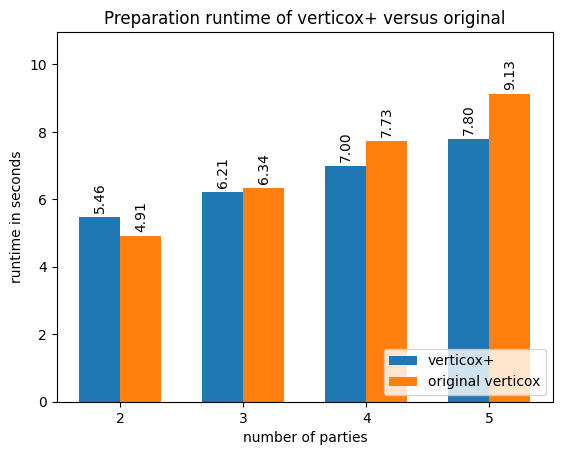

In [13]:
selection = our_mean_with_original.xs(100, level=1)

two_bar_plot(selection.index, selection.preparation_runtime, "verticox+", selection.preparation_runtime_original,\
             "original verticox", "Preparation runtime of verticox+ versus original", "number of parties", "runtime in seconds")



Why is verticox+ faster? Maybe some components in java are faster? Preparation scales linearly in both approaches?

0.3333333333333333

0.16666666666666666

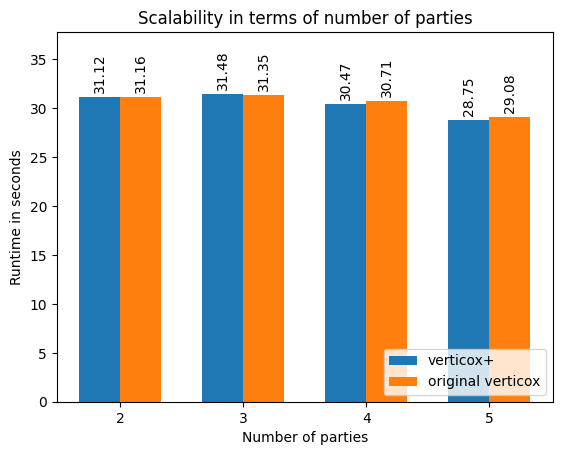

In [14]:
two_bar_plot(selection.index, selection.convergence_runtime, "verticox+", selection.convergence_runtime_original, 
             "original verticox", "Scalability in terms of number of parties", "Number of parties","Runtime in seconds")

Let's plot iterations vs runtime as well

,records,features,preparation_runtime,convergence_runtime,mse,sad,mad,c_index_verticox,c_index_central,preparation_runtime_original,convergence_runtime_original
iterations,,,,,,,,,,,
100,100.0,6.0,6.209272,31.481281,8.649828e-07,0.002748,2.228594e-03,0.555556,0.555556,6.339900,31.346631
500,100.0,6.0,6.232103,78.560774,1.231560e-12,0.000003,2.712553e-06,0.555556,0.555556,6.306947,78.164005
1000,100.0,6.0,6.221297,124.095925,1.504507e-12,0.000004,2.891367e-06,0.555556,0.555556,6.320827,122.406705
1500,100.0,6.0,6.177030,166.749761,2.188890e-12,0.000005,3.427809e-06,0.555556,0.555556,6.310374,168.508839
2000,100.0,6.0,6.218924,211.355715,1.123775e-13,0.000001,8.110444e-07,0.555556,0.555556,6.305974,211.236966


133.33333333333334

66.66666666666667

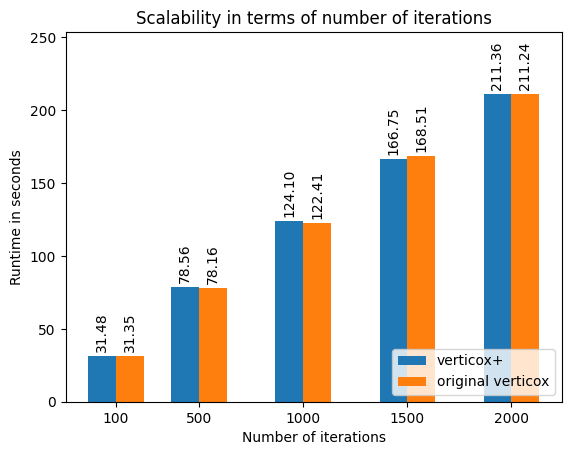

In [15]:
iteration_selection = our_mean_with_original.xs(3, level=0)
display(iteration_selection)


two_bar_plot(iteration_selection.index, iteration_selection.convergence_runtime, "verticox+", iteration_selection.convergence_runtime_original, 
             "original verticox", "Scalability in terms of number of iterations", "Number of iterations","Runtime in seconds")

In [16]:
for index, group in our_mean.groupby("parties"):
    print(group.index.get_level_values(1))

Int64Index([100, 500, 1000, 1500, 2000], dtype='int64', name='iterations')
Int64Index([100, 500, 1000, 1500, 2000], dtype='int64', name='iterations')
Int64Index([100, 500, 1000, 1500, 2000], dtype='int64', name='iterations')
Int64Index([100, 500, 1000, 1500, 2000], dtype='int64', name='iterations')


In [17]:
def plot_y_vs_iterations(column: str, fig=None, ax=None, x_limit=None):
    """
    x axis: iterations
    y: axis: c_index of central (constant) and decentral (multiple points)
    shape/color: number of parties
    """

    linestyles = ["--", "-.", ":"]
    markers = ["o", "^", "*", "+"]
    
    if ax is None:
        fig, ax = plt.subplots()

    for idx, (parties, group) in enumerate(our_mean.groupby("parties")):
        
        x = group.index.get_level_values(1)
        y = group[column]        

        
        if x_limit is not None:
            x_idx = (x <= x_limit).nonzero()[0]
            
            x = x[x_idx]
            y = y.iloc[x_idx]
        
        ax.plot(x, y, linestyle="-", marker=markers[idx],
                label=f"{int(parties)} parties")
        
    return fig, ax


In [18]:
(np.arange(10) < 5).nonzero()

(array([0, 1, 2, 3, 4]),)

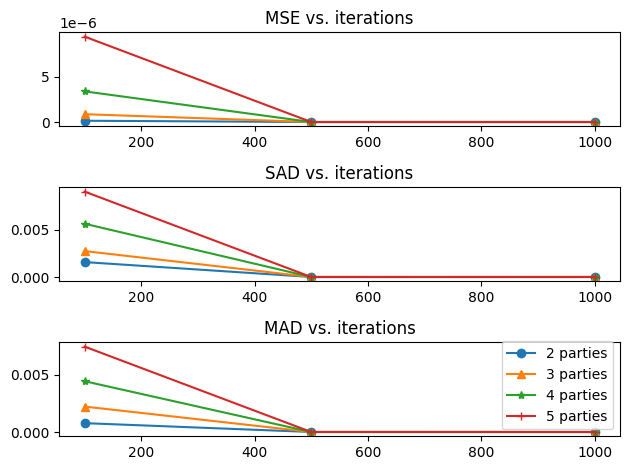

In [19]:
fig, ax = plt.subplots(3)
limit = 1000

plot_y_vs_iterations("mse", fig, ax[0], x_limit=limit)
ax[0].set_title("MSE vs. iterations")
plot_y_vs_iterations("sad", fig, ax[1], x_limit=limit)
ax[1].set_title("SAD vs. iterations")
plot_y_vs_iterations("mad", fig, ax[2], x_limit=limit)
ax[2].set_title("MAD vs. iterations")
plt.tight_layout()
plt.legend()

### Table

In [20]:
our_mean[["preparation_runtime", "convergence_runtime", "mse", "sad", "mad", "c_index_verticox", "c_index_central"]]\
    .style.format("{:.4e}", subset=["mse", "sad", "mad"])\
    .format_index("{:.0f}")

## Features category
### Extract data

In [21]:
features_benchmark = labeled_df[labeled_df.category == "features"]
features_benchmark[["features", "preparation_runtime", "convergence_runtime"]].style.hide()

NameError: name 'labeled_df' is not defined

## Plot features vs preparation runtime

In [ ]:
features = features_benchmark.features
preparation_runtime = features_benchmark.preparation_runtime
convergence_runtime = features_benchmark.convergence_runtime

fig, ax = plt.subplots(2)
ax[0].plot(features, preparation_runtime)
ax[0].set_xlabel("number of features")
ax[0].set_ylabel("preparation runtime")
ax[0].set_title("Number of features vs. preparation runtime")

ax[1].plot(features, convergence_runtime)
ax[1].set_xlabel("number of features")
ax[1].set_ylabel("convergence runtime")
ax[1].set_title("Number of features vs. convergence runtime")

plt.tight_layout()
plt.show()

## Plot features vs convergence runtime

In [ ]:
from verticox.datasets import load_seer

In [ ]:
data, outcome = load_seer()
data

# Records category

In [22]:
query = "category == 'records'"
records_ours = benchmark_ours.query(query)
display("Ours")
display(records_ours)

records_original = benchmark_original.query(query)
display("Original")
display(records_original)

'Ours'

,records,features,iterations,parties,preparation_runtime,convergence_runtime,mse,sad,mad,c_index_verticox,c_index_central,comment,category
75,50,6,500,3,6.270481,41.024703,1.947462e-12,4.821016e-06,2.849379e-06,NaN,NaN,success,records
76,50,6,500,3,6.201749,40.664872,1.947462e-12,4.821016e-06,2.849379e-06,NaN,NaN,success,records
77,50,6,500,3,6.202047,41.414634,1.947462e-12,4.821016e-06,2.849379e-06,NaN,NaN,success,records
78,100,6,500,3,6.183846,78.788945,1.231560e-12,2.991785e-06,2.712553e-06,0.555556,0.555556,success,records
79,100,6,500,3,6.201920,78.142588,1.231560e-12,2.991785e-06,2.712553e-06,0.555556,0.555556,success,records
80,100,6,500,3,6.184729,78.837936,1.231560e-12,2.991785e-06,2.712553e-06,0.555556,0.555556,success,records
81,500,6,500,3,6.344913,1258.688357,3.300806e-14,5.245640e-07,4.412577e-07,0.529808,0.529808,success,records
82,500,6,500,3,6.296527,1260.047638,3.300806e-14,5.245640e-07,4.412577e-07,0.529808,0.529808,success,records
83,500,6,500,3,6.370931,1257.208806,3.300806e-14,5.245640e-07,4.412577e-07,0.529808,0.529808,success,records
84,1000,6,500,3,6.519942,13069.833756,5.843196e-15,2.141210e-07,1.864200e-07,0.446351,0.446351,success,records


'Original'

,records,features,iterations,parties,preparation_runtime,convergence_runtime,mse,sad,mad,c_index_verticox,c_index_central,comment,category
75,50,6,500,3,6.321509,40.648104,1.947462e-12,4.821016e-06,2.849379e-06,NaN,NaN,success,records
76,50,6,500,3,6.358477,40.646244,1.947462e-12,4.821016e-06,2.849379e-06,NaN,NaN,success,records
77,50,6,500,3,6.343748,40.636513,1.947462e-12,4.821016e-06,2.849379e-06,NaN,NaN,success,records
78,100,6,500,3,6.326275,77.050546,1.231560e-12,2.991785e-06,2.712553e-06,0.555556,0.555556,success,records
79,100,6,500,3,6.330295,79.483288,1.231560e-12,2.991785e-06,2.712553e-06,0.555556,0.555556,success,records
80,100,6,500,3,6.320186,78.658826,1.231560e-12,2.991785e-06,2.712553e-06,0.555556,0.555556,success,records
81,500,6,500,3,6.322121,1259.663800,3.300806e-14,5.245640e-07,4.412577e-07,0.529808,0.529808,success,records
82,500,6,500,3,6.314870,1261.927420,3.300806e-14,5.245640e-07,4.412577e-07,0.529808,0.529808,success,records
83,500,6,500,3,6.304630,1262.336697,3.300806e-14,5.245640e-07,4.412577e-07,0.529808,0.529808,success,records


In [23]:
# I need to take the mean per number of records

def take_mean_per_records(df):
    keys = ["records", "preparation_runtime", "convergence_runtime"]
    df = df[keys]
    mean = df.groupby("records").mean()
    return mean

In [24]:
records_ours_mean = take_mean_per_records(records_ours)
records_original_mean = take_mean_per_records(records_original)

records_ours_mean = records_ours_mean.drop(index=1000)
display(records_ours_mean)
display(records_original_mean)


,preparation_runtime,convergence_runtime
records,,
50,6.224759,41.034736
100,6.190165,78.589823
500,6.337457,1258.648267


,preparation_runtime,convergence_runtime
records,,
50,6.341245,40.643620
100,6.325585,78.397553
500,6.313874,1261.309306


16.666666666666668

8.333333333333334

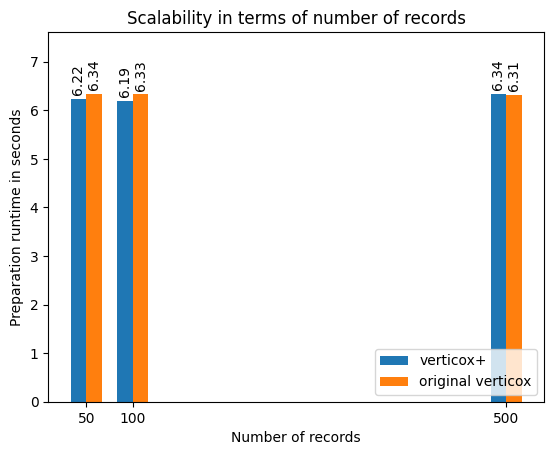

In [31]:
two_bar_plot(records_ours_mean.index, records_ours_mean.preparation_runtime, "verticox+", records_original_mean.preparation_runtime, 
             "original verticox", "Scalability in terms of number of records", "Number of records","Preparation runtime in seconds")

0.3333333333333333

0.16666666666666666

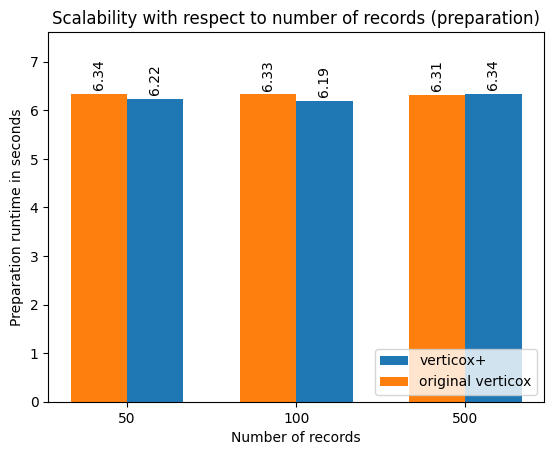

In [53]:


x = records_ours_mean.index.astype("str")
y1 = records_ours_mean.preparation_runtime
y2 = records_original_mean.preparation_runtime
label1 = "verticox+"
label2 = "original verticox"
title = "Scalability with respect to number of records (preparation)"
xlabel =  "Number of records"
ylabel = "Preparation runtime in seconds"

fig, ax = plt.subplots()

max_y = np.concatenate((y1, y2)).max()
y_lim = max_y + max_y/5


bar_width = 1/3
half_bar_width = bar_width/2

display(bar_width)
display(half_bar_width)



bars1 = ax.bar(x,y1, width=1/3, label=label1, align="edge")
bars2 = ax.bar(x , y2, width=-1/3,label=label2, align="edge")
ax.bar_label(bars1, padding=3, fmt="{:.2f}", rotation=90)
ax.bar_label(bars2, padding=3, fmt="{:.2f}", rotation=90)
ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)


ax.set_ylim(0, y_lim)
ax.legend(loc="lower right")

0.3333333333333333

0.16666666666666666

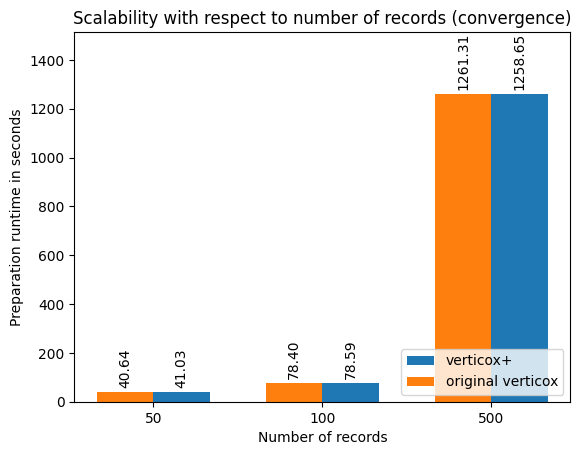

In [54]:
x = records_ours_mean.index.astype("str")
y1 = records_ours_mean.convergence_runtime
y2 = records_original_mean.convergence_runtime
label1 = "verticox+"
label2 = "original verticox"
title = "Scalability with respect to number of records (convergence)"
xlabel =  "Number of records"
ylabel = "Preparation runtime in seconds"

fig, ax = plt.subplots()

max_y = np.concatenate((y1, y2)).max()
y_lim = max_y + max_y/5


bar_width = 1/3
half_bar_width = bar_width/2

display(bar_width)
display(half_bar_width)



bars1 = ax.bar(x,y1, width=1/3, label=label1, align="edge")
bars2 = ax.bar(x , y2, width=-1/3,label=label2, align="edge")
ax.bar_label(bars1, padding=3, fmt="{:.2f}", rotation=90)
ax.bar_label(bars2, padding=3, fmt="{:.2f}", rotation=90)
ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)


ax.set_ylim(0, y_lim)
ax.legend(loc="lower right")